In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

In [4]:
df = pd.read_csv('E-commerce Customer Behavior .csv')

In [6]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [8]:
df.shape

(350, 11)

In [10]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [14]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [16]:
df['City'].unique()

array(['New York', 'Los Angeles', 'Chicago', 'San Francisco', 'Miami',
       'Houston'], dtype=object)

In [18]:
df['Membership Type'].unique()

array(['Gold', 'Silver', 'Bronze'], dtype=object)

In [20]:
df['Discount Applied'].unique()

array([ True, False])

In [22]:
df['Satisfaction Level'].unique()

array(['Satisfied', 'Neutral', 'Unsatisfied', nan], dtype=object)

In [24]:
df['Satisfaction Level'].value_counts()

Satisfaction Level
Satisfied      125
Unsatisfied    116
Neutral        107
Name: count, dtype: int64

In [26]:
df.dropna(inplace=True)

In [28]:
df.shape

(348, 11)

In [30]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [32]:
df_num = df[['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level']]

In [34]:
def str_in_num(x):

    if x == 'Female':

        return 0

    else:

        return 1

In [36]:
df_num['Gender'] = df_num['Gender'].apply(str_in_num)

In [38]:
df_num['Gender']

0      0
1      1
2      0
3      1
4      1
      ..
345    1
346    0
347    0
348    1
349    0
Name: Gender, Length: 348, dtype: int64

In [40]:
def city_to_num(y):

    if y == 'New York':

        return 0

    elif y == 'Los Angeles':

        return 1

    elif y == 'Chicago':

        return 2

    elif y == 'San Francisco':

        return 3

    elif y == 'Miami':

        return 4

    elif y == 'Houston':

        return 5

In [42]:
df_num['City'] = df_num['City'].apply(city_to_num)

In [44]:
def mem_to_num(z):

    if z =='Gold':
    
        return 0
    
    elif z == 'Silver':

        return 1

    elif z == 'Bronze':

        return 2


In [46]:
df_num['Membership Type'] = df_num['Membership Type'].apply(mem_to_num)

In [48]:
def stif_num(s):

    if s == 'Satisfied':

        return 1

    elif s == 'Neutral':

        return 2

    elif s == 'Unsatisfied':

        return 3

In [50]:
df_num['Satisfaction Level'] = df_num['Satisfaction Level'].apply(stif_num)

In [52]:
df_num

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,0,29,0,0,1120.20,14,4.6,True,25,1
1,102,1,34,1,1,780.50,11,4.1,False,18,2
2,103,0,43,2,2,510.75,9,3.4,True,42,3
3,104,1,30,3,0,1480.30,19,4.7,False,12,1
4,105,1,27,4,1,720.40,13,4.0,True,55,3
...,...,...,...,...,...,...,...,...,...,...,...
345,446,1,32,4,1,660.30,10,3.8,True,42,3
346,447,0,36,5,2,470.50,8,3.0,False,27,2
347,448,0,30,0,0,1190.80,16,4.5,True,28,1
348,449,1,34,1,1,780.20,11,4.2,False,21,2


In [54]:
df_num.drop(['Customer ID'],axis=1,inplace=True)

In [56]:
df_num.columns

Index(['Gender', 'Age', 'City', 'Membership Type', 'Total Spend',
       'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level'],
      dtype='object')

In [58]:
df_num.describe()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Satisfaction Level
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,0.502874,33.577586,2.474138,0.991379,847.793103,12.632184,4.023563,26.614943,1.974138
std,0.500712,4.878024,1.706714,0.815862,361.692375,4.146079,0.579145,13.474750,0.832979
min,0.000000,26.000000,0.000000,0.000000,410.800000,7.000000,3.000000,9.000000,1.000000
25%,0.000000,30.000000,1.000000,0.000000,505.750000,9.000000,3.500000,15.000000,1.000000
50%,1.000000,32.000000,2.000000,1.000000,780.200000,12.000000,4.100000,23.000000,2.000000
75%,1.000000,37.000000,4.000000,2.000000,1160.600000,15.000000,4.500000,38.000000,3.000000
max,1.000000,43.000000,5.000000,2.000000,1520.100000,21.000000,4.900000,63.000000,3.000000


In [60]:
df_num.corr()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
Gender,1.000000,-0.581774,0.094511,-0.405573,0.387471,0.439175,0.492687,-0.344872,-0.214256,-0.037824
Age,-0.581774,1.000000,0.012011,0.790544,-0.676826,-0.684397,-0.721752,0.061262,0.170437,0.463274
City,0.094511,0.012011,1.000000,0.474820,-0.396476,-0.321862,-0.512229,-0.286555,0.195427,0.381637
Membership Type,-0.405573,0.790544,0.474820,1.000000,-0.945334,-0.896343,-0.949810,0.003588,0.420431,0.741763
Total Spend,0.387471,-0.676826,-0.396476,-0.945334,1.000000,0.972276,0.941190,-0.168530,-0.544679,-0.797494
Items Purchased,0.439175,-0.684397,-0.321862,-0.896343,0.972276,1.000000,0.921396,-0.123037,-0.425425,-0.692850
Average Rating,0.492687,-0.721752,-0.512229,-0.949810,0.941190,0.921396,1.000000,-0.076756,-0.435921,-0.694679
Discount Applied,-0.344872,0.061262,-0.286555,0.003588,-0.168530,-0.123037,-0.076756,1.000000,0.760032,0.425115
Days Since Last Purchase,-0.214256,0.170437,0.195427,0.420431,-0.544679,-0.425425,-0.435921,0.760032,1.000000,0.773735
Satisfaction Level,-0.037824,0.463274,0.381637,0.741763,-0.797494,-0.692850,-0.694679,0.425115,0.773735,1.000000


In [62]:
df_num[(df_num['Gender'] == 0) & (df_num['Satisfaction Level'] == 1)].count() # Female, Satifised

Gender                      58
Age                         58
City                        58
Membership Type             58
Total Spend                 58
Items Purchased             58
Average Rating              58
Discount Applied            58
Days Since Last Purchase    58
Satisfaction Level          58
dtype: int64

In [64]:
df_num[(df_num['Gender'] == 0) & (df_num['Satisfaction Level'] == 2)].count() # Female , Natural

Gender                      56
Age                         56
City                        56
Membership Type             56
Total Spend                 56
Items Purchased             56
Average Rating              56
Discount Applied            56
Days Since Last Purchase    56
Satisfaction Level          56
dtype: int64

In [66]:
df_num[(df_num['Gender'] == 0) & (df_num['Satisfaction Level'] == 3)].count() # Female , Unstifised

Gender                      59
Age                         59
City                        59
Membership Type             59
Total Spend                 59
Items Purchased             59
Average Rating              59
Discount Applied            59
Days Since Last Purchase    59
Satisfaction Level          59
dtype: int64

<Axes: xlabel='Gender', ylabel='Total Spend'>

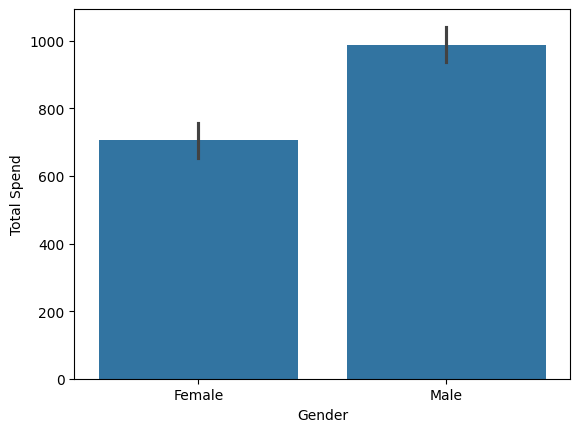

In [68]:
sns.barplot(data=df,
    x='Gender',
    y='Total Spend',)

<Axes: xlabel='Gender', ylabel='Satisfaction Level'>

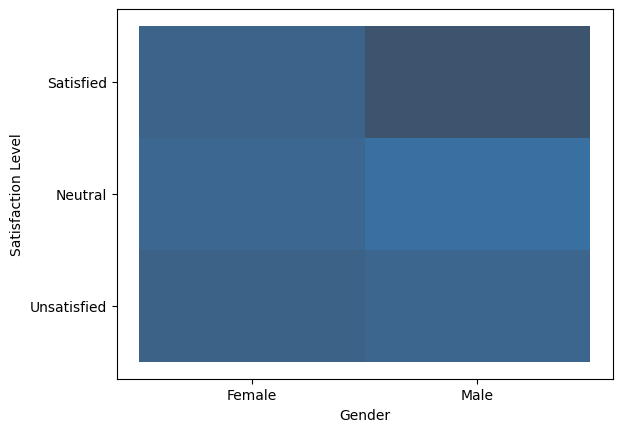

In [70]:
sns.histplot(data=df,
    x='Gender',
    y='Satisfaction Level',)

In [72]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Satisfied')].count()

Customer ID                 59
Gender                      59
Age                         59
City                        59
Membership Type             59
Total Spend                 59
Items Purchased             59
Average Rating              59
Discount Applied            59
Days Since Last Purchase    59
Satisfaction Level          59
dtype: int64

In [74]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Neutral')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [76]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 116
Gender                      116
Age                         116
City                        116
Membership Type             116
Total Spend                 116
Items Purchased             116
Average Rating              116
Discount Applied            116
Days Since Last Purchase    116
Satisfaction Level          116
dtype: int64

In [78]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Satisfied') & (df['Membership Type'] == 'Gold')].count()

Customer ID                 59
Gender                      59
Age                         59
City                        59
Membership Type             59
Total Spend                 59
Items Purchased             59
Average Rating              59
Discount Applied            59
Days Since Last Purchase    59
Satisfaction Level          59
dtype: int64

In [80]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Unsatisfied') & (df['Membership Type'] == 'Gold')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [82]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Satisfied') & (df['Membership Type'] == 'Silver')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [84]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Unsatisfied') & (df['Membership Type'] == 'Silver')].count()

Customer ID                 58
Gender                      58
Age                         58
City                        58
Membership Type             58
Total Spend                 58
Items Purchased             58
Average Rating              58
Discount Applied            58
Days Since Last Purchase    58
Satisfaction Level          58
dtype: int64

In [86]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Satisfied') & (df['Membership Type'] == 'Bronze')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [88]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Unsatisfied') & (df['Membership Type'] == 'Bronze')].count()

Customer ID                 58
Gender                      58
Age                         58
City                        58
Membership Type             58
Total Spend                 58
Items Purchased             58
Average Rating              58
Discount Applied            58
Days Since Last Purchase    58
Satisfaction Level          58
dtype: int64

In [90]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Neutral') & (df['Membership Type'] == 'Gold')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [92]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Neutral') & (df['Membership Type'] == 'Silver')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [94]:
df[(df['Discount Applied'] == True) & (df['Satisfaction Level'] == 'Neutral') & (df['Membership Type'] == 'Bronze')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [96]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Satisfied')].count()

Customer ID                 66
Gender                      66
Age                         66
City                        66
Membership Type             66
Total Spend                 66
Items Purchased             66
Average Rating              66
Discount Applied            66
Days Since Last Purchase    66
Satisfaction Level          66
dtype: int64

In [98]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Neutral')].count()

Customer ID                 107
Gender                      107
Age                         107
City                        107
Membership Type             107
Total Spend                 107
Items Purchased             107
Average Rating              107
Discount Applied            107
Days Since Last Purchase    107
Satisfaction Level          107
dtype: int64

In [100]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [104]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Satisfied') & (df['Membership Type'] == 'Gold')].count()

Customer ID                 58
Gender                      58
Age                         58
City                        58
Membership Type             58
Total Spend                 58
Items Purchased             58
Average Rating              58
Discount Applied            58
Days Since Last Purchase    58
Satisfaction Level          58
dtype: int64

In [106]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Unsatisfied') & (df['Membership Type'] == 'Gold')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [108]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Satisfied') & (df['Membership Type'] == 'Silver')].count()

Customer ID                 8
Gender                      8
Age                         8
City                        8
Membership Type             8
Total Spend                 8
Items Purchased             8
Average Rating              8
Discount Applied            8
Days Since Last Purchase    8
Satisfaction Level          8
dtype: int64

In [110]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Unsatisfied') & (df['Membership Type'] == 'Silver')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [112]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Satisfied') & (df['Membership Type'] == 'Bronze')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [114]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Unsatisfied') & (df['Membership Type'] == 'Bronze')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [116]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Neutral') & (df['Membership Type'] == 'Gold')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [118]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Neutral') & (df['Membership Type'] == 'Silver')].count()

Customer ID                 51
Gender                      51
Age                         51
City                        51
Membership Type             51
Total Spend                 51
Items Purchased             51
Average Rating              51
Discount Applied            51
Days Since Last Purchase    51
Satisfaction Level          51
dtype: int64

In [120]:
df[(df['Discount Applied'] == False) & (df['Satisfaction Level'] == 'Neutral') & (df['Membership Type'] == 'Bronze')].count()

Customer ID                 56
Gender                      56
Age                         56
City                        56
Membership Type             56
Total Spend                 56
Items Purchased             56
Average Rating              56
Discount Applied            56
Days Since Last Purchase    56
Satisfaction Level          56
dtype: int64

In [122]:
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [124]:
df[(df['Items Purchased'] >= 1 )&
( df['Items Purchased'] <= 5) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Satisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [126]:
df[(df['Items Purchased'] >= 6 )&
( df['Items Purchased'] <= 11) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Satisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [128]:
df[(df['Items Purchased'] >= 10)&
( df['Items Purchased'] <= 22) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Satisfied')].count()

Customer ID                 59
Gender                      59
Age                         59
City                        59
Membership Type             59
Total Spend                 59
Items Purchased             59
Average Rating              59
Discount Applied            59
Days Since Last Purchase    59
Satisfaction Level          59
dtype: int64

In [130]:
df[(df['Items Purchased'] >= 1)&
( df['Items Purchased'] <= 5) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [132]:
df[(df['Items Purchased'] >= 5)&
( df['Items Purchased'] <= 10) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [134]:
df[(df['Items Purchased'] >= 11)&
( df['Items Purchased'] <= 15) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [136]:
df[(df['Items Purchased'] >= 16)&
( df['Items Purchased'] <= 20) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

In [138]:
df[(df['Items Purchased'] >= 20)&
( df['Items Purchased'] <= 25) & 
(df['Discount Applied'] == True) &
(df['Membership Type'] == 'Gold') &
(df['Satisfaction Level'] == 'Unsatisfied')].count()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64

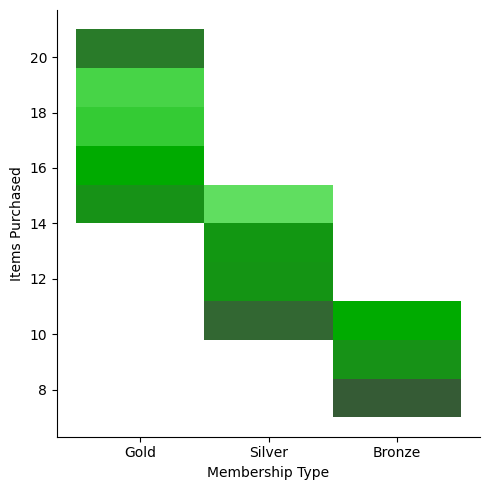

In [140]:
sns.displot(data = df,
           x = df['Membership Type'],
           y = df['Items Purchased'],
           color = 'green')

<function matplotlib.pyplot.show(close=None, block=None)>

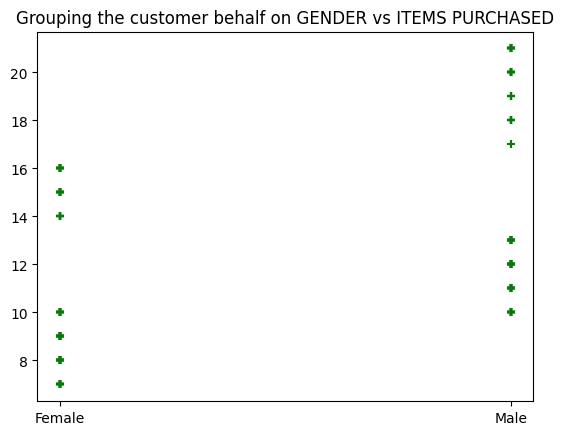

In [150]:
plt.scatter(df['Gender'],
            df['Items Purchased'],
    color = 'Green',
    marker = '+')

plt.title('Grouping the customer behalf on GENDER vs ITEMS PURCHASED')

plt.show

In [157]:
from sklearn.cluster import KMeans

In [159]:
km = KMeans(n_clusters=3)

In [161]:
y_predict = km.fit_predict(df_num[['Membership Type','Total Spend']])

/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [163]:
y_predict

array([0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,
       2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0, 2, 1, 0,

In [165]:
df_num['Clusters'] = y_predict

In [169]:
df_num['Clusters']

0      0
1      2
2      1
3      0
4      2
      ..
345    2
346    1
347    0
348    2
349    1
Name: Clusters, Length: 348, dtype: int32

In [171]:
centers = km.cluster_centers_

In [173]:
centers

array([[4.44089210e-16, 1.31114444e+03],
       [2.00000000e+00, 4.74223684e+02],
       [1.00000000e+00, 7.48432479e+02]])

In [175]:
x = centers[:,0]

In [177]:
y = centers[:,1]

In [179]:
x

array([4.4408921e-16, 2.0000000e+00, 1.0000000e+00])

In [181]:
y

array([1311.14444444,  474.22368421,  748.43247863])

In [183]:
df_1 = df_num[df_num['Clusters'] == 0]

In [185]:
df_2 = df_num[df_num['Clusters'] == 1]

In [187]:
df_3 = df_num[df_num['Clusters'] == 2]

In [201]:
len(df_1)

117

In [203]:
len(df_2)

114

In [205]:
len(df_3)

117

Text(0.5, 1.0, 'MEMEBERTYPE VS TOTAL SPEND = 0 = GOLD = Silver = 1, Bronze = 2 ')

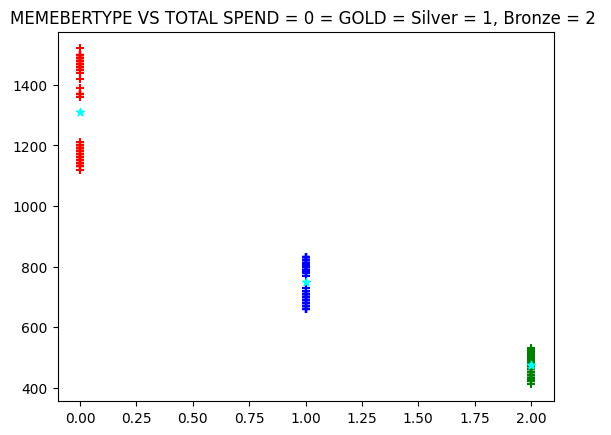

In [215]:
plt.scatter(x = df_1['Membership Type'],
           y = df_1['Total Spend'],
           color = 'red',
           marker='+' )

plt.scatter(x = df_2['Membership Type'],
           y = df_2['Total Spend'],
           color = 'green',
           marker='+' )

plt.scatter(x = df_3['Membership Type'],
           y = df_3['Total Spend'],
           color = 'blue',
           marker='+' )

plt.scatter(x = x ,
           y = y ,
           color = 'cyan',
           label = 'centroied',
           marker='*')
plt.title('MEMEBERTYPE VS TOTAL SPEND = 0 = GOLD = Silver = 1, Bronze = 2 ')

In [217]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
ms = MinMaxScaler()

In [221]:
ms.fit(df_num[['Membership Type']])

MinMaxScaler()

In [223]:
df_num['Membership Type'] = ms.fit_transform(df_num[['Membership Type']])

In [225]:
df_num['Membership Type']

0      0.0
1      0.5
2      1.0
3      0.0
4      0.5
      ... 
345    0.5
346    1.0
347    0.0
348    0.5
349    1.0
Name: Membership Type, Length: 348, dtype: float64

In [227]:
ms.fit(df_num[['Total Spend']])

MinMaxScaler()

In [229]:
df_num['Total Spend'] = ms.fit_transform(df_num[['Total Spend']])

In [231]:
df_num['Total Spend']

0      0.639502
1      0.333273
2      0.090102
3      0.964122
4      0.279095
         ...   
345    0.224917
346    0.053818
347    0.703146
348    0.333003
349    0.094609
Name: Total Spend, Length: 348, dtype: float64

In [233]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_num[['Membership Type','Total Spend']])
    sse.append(km.inertia_)

/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/amanchauhan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

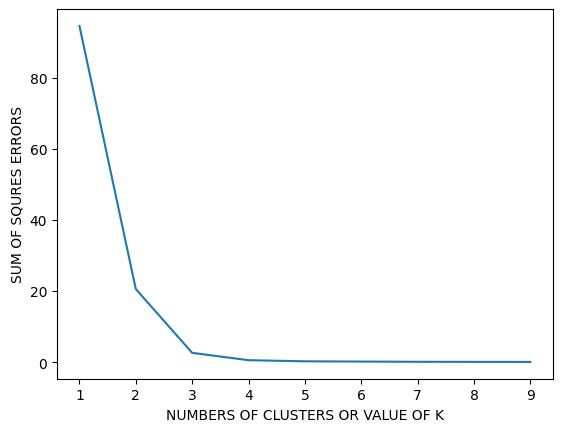

In [235]:
plt.xlabel('NUMBERS OF CLUSTERS OR VALUE OF K')

plt.ylabel('SUM OF SQURES ERRORS')

plt.plot(k_rng,sse)

plt.show()

# THE final conclusion on the data set for E-Commerace company please give the some more discount to (Bronze Membertype) and 
# some discount(silver Membertype )
# Target the age of 30+ customers for growing the product selling and all
# and some better service 

# do the more advertige age of 18 to 30 and some special features like service quality , shoping the products less days and safe delivery